## Plot Solutions to Time-dependent Schrodinger Equation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [2]:
def read_wavefunction_file(filename):
    """Read wavefunction and x and t grid from file.

    Args:
        filename (str): Name of file

    Returns:
        Tuple of x grid, t grid, and wavefunction

    """
    with open(filename) as f:
        data = f.readlines()

    # get the x and t grids
    x_grid = np.array(data[0].split()[3:], dtype=float)
    t_grid = np.array(data[1].split()[3:], dtype=float)
    
    # get wavefunction
    wavefunction = np.zeros((len(x_grid), len(t_grid)), dtype=complex)

    for i in range(len(t_grid)):
        z_str = [x.strip(')').strip('(').split(',') for x in data[i + 2].split()]
        wavefunction[:, i] = np.array([complex(float(a[0]), float(a[1])) for a in z_str], dtype=complex)

    return x_grid, t_grid, wavefunction

In [3]:
def get_norm(complex_array, dx):
    """Get norm of wavefunction.

    Args:
        complex_array: Complex-valued wavefunction
        dx: Discretization spacing for integration

    Returns:
        Norm of wavefunction

    """
    return np.sqrt(np.real(sum(np.conj(complex_array) * complex_array * dx)))

In [4]:
def get_ave_x(wavefunction, x_grid):
    """Get expectation value of x over time.

    Args:
        wavefunction: Complex-valued wavefunction in time
        x_grid: Grid of x points

    Returns:
        Average position

    """
    dx = x_grid[1] - x_grid[0]
    Nx = len(x_grid)
    Nt = len(t_grid)

    square_norm_wf = np.absolute(wavefunction) ** 2

    x_grid_mat = np.tile(x_grid.T.reshape((Nx, 1)), (1, Nt))
    ave_x = (square_norm_wf * x_grid_mat * dx).sum(axis=0)

    return ave_x

In [5]:
def plot_wavefunction_in_time(wavefunction, x_grid, t_grid, filename):
    """Plot wavefunction evolution in time.

    Args:
        wavefunction: Complex-valued wavefunction in time
        x_grid: Grid of x points
        t_grid: Grid of t points
        filename: Name of plot to save

    """
    wf1 = np.absolute(wavefunction[:, 0]) ** 2
    wf2 = np.absolute(wavefunction[:, len(t_grid) - 1]) ** 2

    plt.figure(figsize=(11, 4))
    plt.plot(x_grid, wf1, lw=2, label="t=0")
    plt.plot([0, 0], [0, max(wf1)], "--", c="k")
    plt.plot(x_grid, wf2, lw=2, label="t=T")
    plt.plot([1, 1], [0, max(wf2)], "--", c="k")
    plt.legend()
    plt.xticks(np.arange(x_grid[0], x_grid[-1] + 1))
    plt.xlabel("Position")
    plt.ylabel("Square Wavefunction Norm")
    
    plt.savefig(filename, format="pdf", bbox_inches="tight")

In [6]:
def plot_square_norm(wavefunction, x_grid, t_grid, filename):
    """Plot square norm of wavefunction in time.

    Args:
        wavefunction: Complex-valued wavefunction in time
        x_grid: Grid of x points
        t_grid: Grid of t points
        filename: Name of plot to save

    """
    square_norm_wf = np.absolute(wavefunction) ** 2

    plt.figure(figsize=(6, 5))
    plt.imshow(
        square_norm_wf.T,
        origin="lower",
        extent=[x_grid[0], x_grid[-1], t_grid[0], t_grid[-1]],
        cmap="plasma",
        aspect="auto"
    )
    plt.xlim([x_grid[0], x_grid[-1]])
    plt.xticks(np.arange(x_grid[0], x_grid[-1] + 1))
    plt.xlabel("Position")
    plt.ylabel("Time")
    plt.colorbar();

    plt.savefig(filename, format="pdf", bbox_inches="tight")

In [7]:
def plot_position_expectation(wavefunction, x_grid, t_grid, filename):
    """Plot expectation value of position.

    Args:
        wavefunction: Complex-valued wavefunction in time
        x_grid: Grid of x points
        t_grid: Grid of t points
        filename: Name of plot to save

    """
    ave_x = get_ave_x(wavefunction, x_grid)

    plt.figure(figsize=(6, 5))
    plt.plot(t_grid, ave_x)
    plt.plot(t_grid, t_grid / t_grid[-1], "--")
    plt.xlabel("Time")
    plt.ylabel("Average position");

    plt.savefig(filename, format="pdf", bbox_inches="tight")

In [8]:
plot_dir = f"..{os.sep}plots"

## Plot Wavefunction Square Norm and Expected Position

### T = 10

In [9]:
filename = "../data/psi_Nt_1000_tmax_10.txt"
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

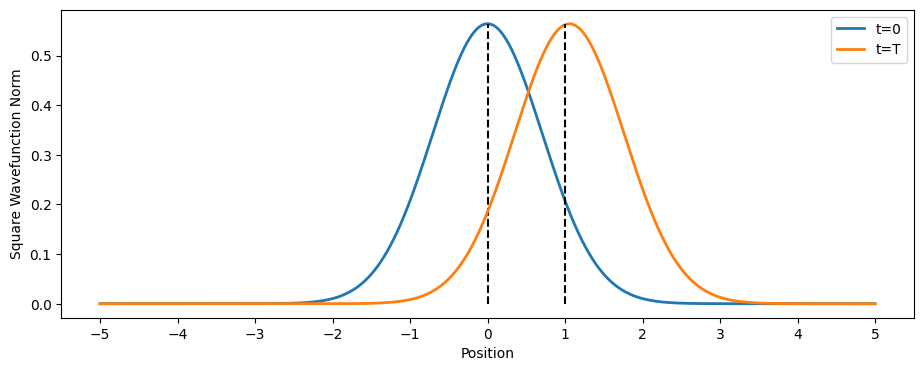

In [10]:
plot_name = f"{plot_dir}{os.sep}wavefunction_evolution_Nt_1000_tmax_10.pdf"
plot_wavefunction_in_time(wavefunction, x_grid, t_grid, plot_name)

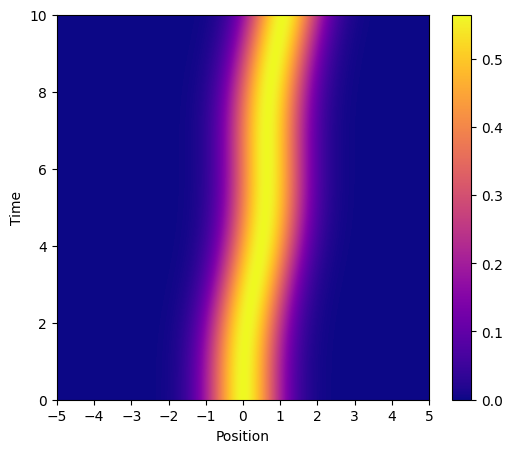

In [11]:
plot_name = f"{plot_dir}{os.sep}square_norm_Nt_1000_tmax_10.pdf"
plot_square_norm(wavefunction, x_grid, t_grid, plot_name)

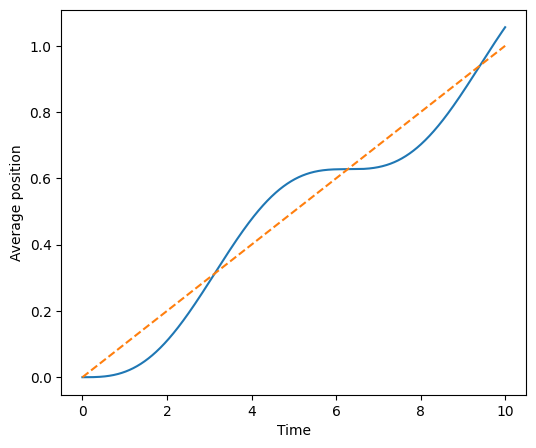

In [12]:
plot_name = f"{plot_dir}{os.sep}expected_position_Nt_1000_tmax_10.pdf"
plot_position_expectation(wavefunction, x_grid, t_grid, plot_name)

### T = 50

In [13]:
filename = "../data/psi_Nt_1000_tmax_50.txt"
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

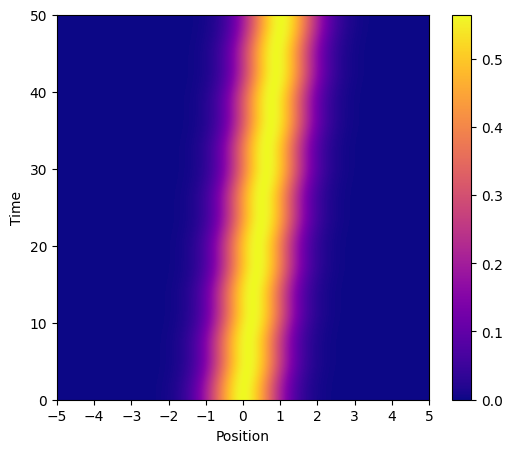

In [14]:
plot_name = f"{plot_dir}{os.sep}square_norm_Nt_1000_tmax_50.pdf"
plot_square_norm(wavefunction, x_grid, t_grid, plot_name)

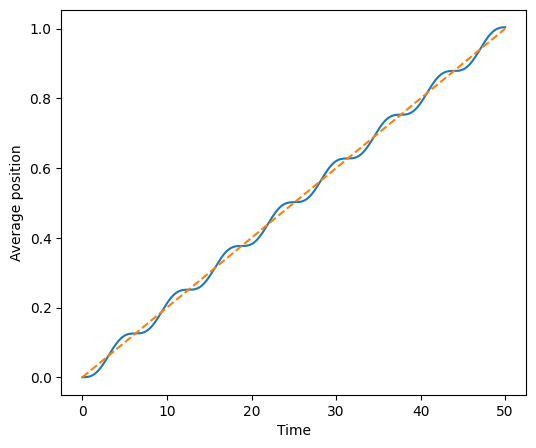

In [15]:
plot_name = f"{plot_dir}{os.sep}expected_position_Nt_1000_tmax_50.pdf"
plot_position_expectation(wavefunction, x_grid, t_grid, plot_name)

### T = 100

In [16]:
filename = "../data/psi_Nt_1000_tmax_100.txt"
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

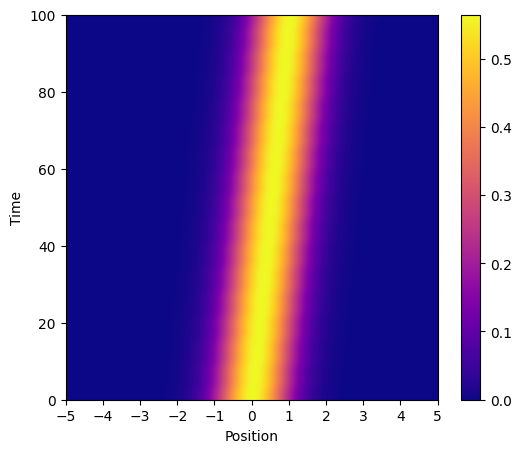

In [17]:
plot_name = f"{plot_dir}{os.sep}square_norm_Nt_1000_tmax_100.pdf"
plot_square_norm(wavefunction, x_grid, t_grid, plot_name)

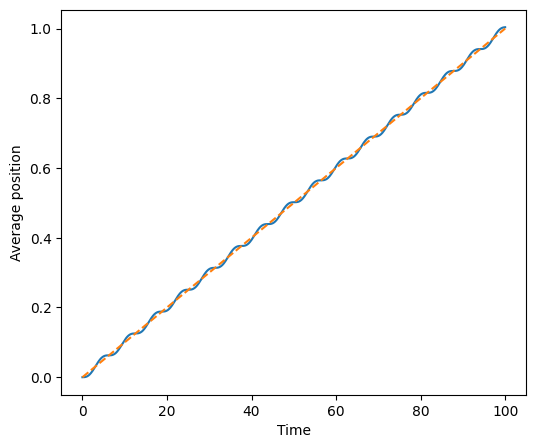

In [18]:
plot_name = f"{plot_dir}{os.sep}expected_position_Nt_1000_tmax_100.pdf"
plot_position_expectation(wavefunction, x_grid, t_grid, plot_name)

## Plot Delta in Position

In [19]:
T_vals = [100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [20]:
delta_x = []

for T in T_vals:
    filename = f"../data/psi_Nt_1000_tmax_{T}.txt"
    x_grid, t_grid, wavefunction = read_wavefunction_file(filename)
    ave_x = get_ave_x(wavefunction, x_grid)
    delta_x.append(np.max(np.abs(ave_x - t_grid / t_grid[-1])))

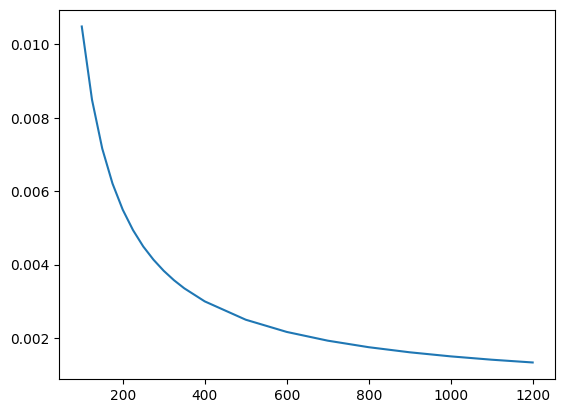

In [21]:
plt.plot(T_vals, delta_x);

In [22]:
def func(x, a, b):
    return a * x ** b

In [23]:
popt, pcov = curve_fit(func, T_vals, delta_x)

In [24]:
popt

array([ 0.60259904, -0.88342625])

## Effect of Discretization

In [25]:
filename = "../data/psi_Nt_100_tmax_1000.txt"
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

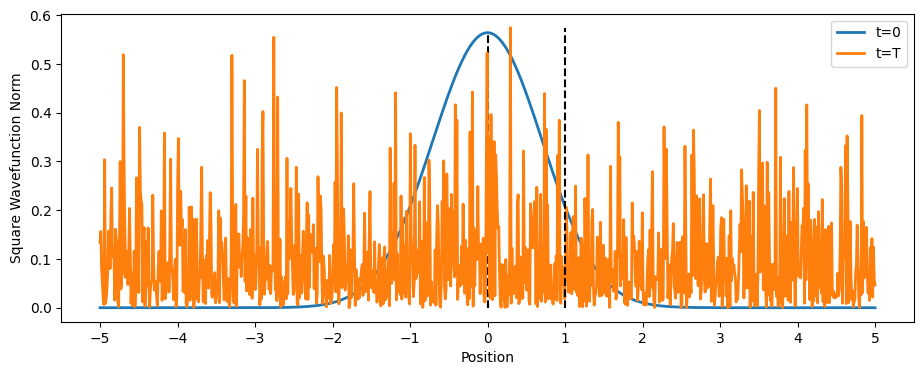

In [26]:
plot_name = f"{plot_dir}{os.sep}wavefunction_evolution_Nt_100_tmax_1000.pdf"
plot_wavefunction_in_time(wavefunction, x_grid, t_grid, plot_name)

In [27]:
filename = "../data/psi_Nt_500_tmax_1000.txt"
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

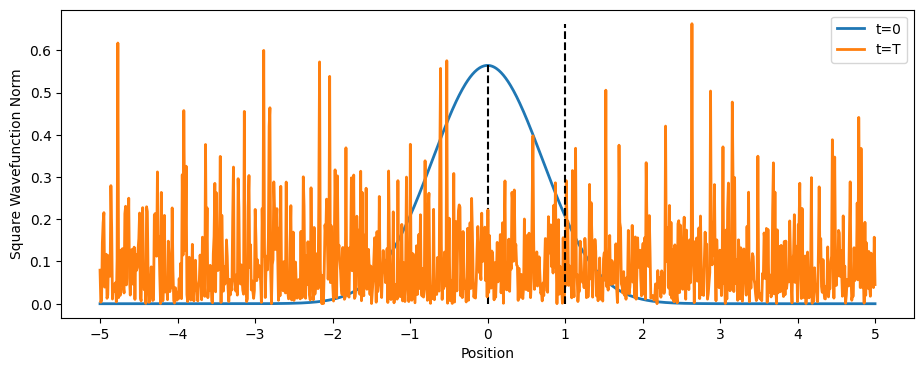

In [28]:
plot_name = f"{plot_dir}{os.sep}wavefunction_evolution_Nt_500_tmax_1000.pdf"
plot_wavefunction_in_time(wavefunction, x_grid, t_grid, plot_name)

In [29]:
filename = "../data/psi_Nt_750_tmax_1000.txt"
x_grid, t_grid, wavefunction = read_wavefunction_file(filename)

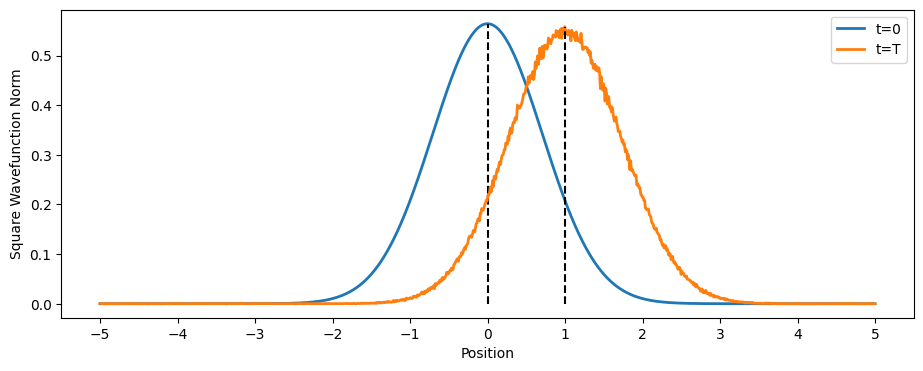

In [30]:
plot_name = f"{plot_dir}{os.sep}wavefunction_evolution_Nt_750_tmax_1000.pdf"
plot_wavefunction_in_time(wavefunction, x_grid, t_grid, plot_name)